# demo02_clusters.ipynb  聚类模型

In [2]:
import numpy as np
import pandas as pd
import sklearn.cluster as sc

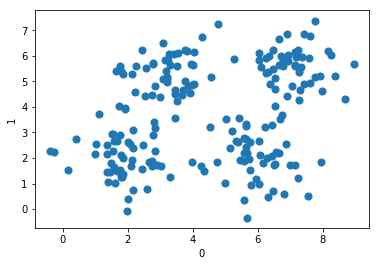

In [13]:
# 加载数据
data = pd.read_csv('multiple3.txt', header=None)
data.plot.scatter(x=0, y=1, s=50)

## Kmeans聚类算法

In [45]:
import sklearn.metrics as sm

model = sc.KMeans(n_clusters=4)
model.fit(data)
labels = model.labels_

# 计算轮廓系数
s = sm.silhouette_score(data, labels, sample_size=len(data), metric='euclidean')
print(s)

0.5773232071896658


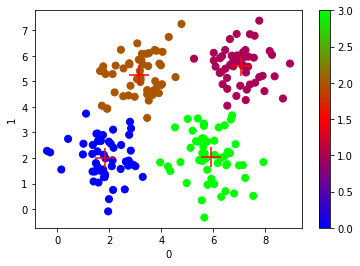

In [38]:
ax = data.plot.scatter(x=0, y=1, c=labels, cmap='brg', s=50)
# 获取四个聚类中心
centers = model.cluster_centers_
centers = pd.DataFrame(centers)
centers.plot.scatter(x=0, y=1, c='red', marker='+', s=400, ax=ax)

## DBSCAN算法实现聚类

In [58]:
# 创建DBSCAN模型并训练模型
params = np.arange(0.5, 1.0, 0.1)
models, scores, epss = [],[],[]
for param in params:
    model = sc.DBSCAN(eps=param, min_samples=5)
    model.fit(data)
    labels = model.labels_
    score = sm.silhouette_score(
        data, labels, sample_size=len(data), metric='euclidean')
    models.append(model)
    scores.append(score)
    epss.append(param)

best_ind = np.argmax(scores)
best_model = models[best_ind-2]
best_score = scores[best_ind-2]
best_eps = epss[best_ind-2]
best_model, best_score, best_eps

(DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
     metric_params=None, min_samples=5, n_jobs=1, p=None),
 0.3473030719460079,
 0.6)

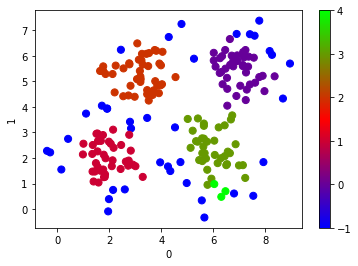

In [59]:
# 利用最优模型绘图
labels = best_model.labels_
data.plot.scatter(x=0, y=1,s=50, c=labels, cmap='brg')

In [60]:
data[labels==-1]

0     1
0    1.96 -0.09
1    2.84  3.16
2    4.74  1.84
5    4.29  6.74
10   5.56  0.34
19   8.68  4.33
23   7.59  6.79
24   1.92  3.93
26   5.66 -0.33
46   7.54  0.52
56   0.42  2.75
73   1.92  3.94
96   3.96  1.83
102  4.35  1.49
107  5.26  5.89
114  6.80  0.61
116  1.11  3.74
121  2.45  6.24
123  8.17  6.19
126  7.93  1.84
130  4.53  3.20
131  8.95  5.70
132  1.99  0.39
136  0.16  1.55
143  8.26  6.04
145  3.46  3.57
148 -0.27  2.22
149  2.80  3.42
151  6.90  6.86
152  2.60  0.77
158  4.26  1.67
159  4.78  7.25
164 -0.39  2.28
167  7.77  7.38
169  1.72  4.05
171  7.41  6.85
194  4.98  1.02
196  2.15  0.75